Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

Importing the Training Data

In [2]:
train_base_dir = 'train'

classes = ['fire', 'nofire']

fire_file_paths = []
nofire_file_paths = []

for class_name in classes:
    class_dir = os.path.join(train_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_file_paths.extend(file_paths)

Importing the Testing Data

In [3]:
test_base_dir = 'test'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(test_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Importing the Validation Data

In [4]:
val_base_dir = 'val'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(val_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Importing the Pretrained CNN

In [5]:
# Load the VGG16 model with pre-trained weights and exclude the top (fully connected) layers
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create a custom head for binary classification
x = Flatten()(pretrained_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Combine the base model and the custom head
model = Model(inputs=pretrained_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# You can print a summary of the model's architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Image Generator

In [6]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

val_generator = data_gen.flow_from_directory(
    'val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


Compile and Train Model

In [7]:
# Train the model on the training data
history = model.fit(train_generator, epochs=3, validation_data=val_generator)  # Adjust the number of epochs as needed

# Save the trained model to a file
model.save('pretrainedCNN.h5')  # Replace 'your_trained_model.h5' with your desired file name

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/3
16/59 [=======>......................] - ETA: 5:46 - loss: 0.8781 - accuracy: 0.5508

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 412s 7s/step - loss: 0.5874 - accuracy: 0.7027 - val_loss: 0.5116 - val_accuracy: 0.7438
Epoch 2/3
59/59 [==============================] - 431s 7s/step - loss: 0.4217 - accuracy: 0.8129 - val_loss: 0.4705 - val_accuracy: 0.7687
Epoch 3/3
59/59 [==============================] - 324s 5s/step - loss: 0.3890 - accuracy: 0.8203 - val_loss: 0.4913 - val_accuracy: 0.7736


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model

In [8]:
# Load the saved model
#model = keras.models.load_model('pretrainedCNN.h5')  # Replace with the path to your saved model

# Define data augmentation parameters for testing (you can customize as needed)
test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create a data generator for testing
test_generator = test_data_gen.flow_from_directory(
    'test',  # Path to the 'test' directory
    target_size=(128, 128),  # Input image dimensions
    batch_size=32,
    class_mode='binary',  # Binary classification (fire/nofire)
    shuffle=False  # Don't shuffle the data for testing
)

# Evaluate the model on the testing data
test_pred = model.predict(test_generator)
test_labels = test_generator.classes

# Convert probabilities to binary predictions (0 or 1)
test_predictions = (test_pred > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1 score
test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions)
test_f1_score = f1_score(test_labels, test_predictions)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test precision: {test_precision:.2f}')
print(f'Test recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1_score:.2f}')

Found 410 images belonging to 2 classes.
 4/13 [========>.....................] - ETA: 31s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/13 [===============>..............] - ETA: 23s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/13 [======================>.......] - ETA: 13s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 62s 5s/step
Test accuracy: 79.51%
Test precision: 0.76
Test recall: 0.98
Test F1 Score: 0.85


Plotting Training and Validation Loss

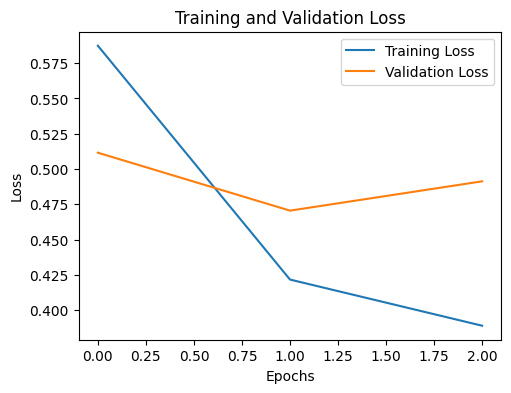

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Plotting Accuracy

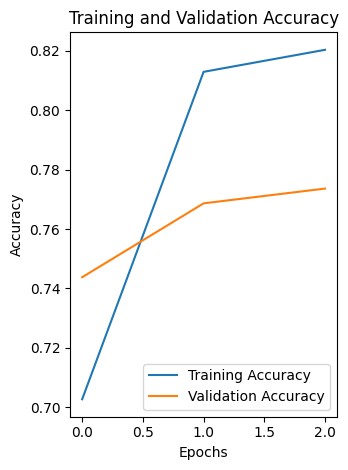

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()